In [1]:
# library
import nltk
from sklearn import preprocessing
import pandas as pd
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import os
from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import graphviz 
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz  
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from nltk.stem.porter import PorterStemmer
# import library
import requests
import re
import pandas as pd
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pkg_resources
pkg_resources.require("scikit-learn==0.24.2")
import sklearn
import nltk
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt, mpld3
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import re
from mpl_toolkits.mplot3d import Axes3D
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import emoji
import requests  ## for getting data from a server

import graphviz

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

from sklearn import preprocessing

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pyLDAvis.sklearn as LDAvis
import pyLDAvis

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

In [2]:
##############################################################
##
##       A Stemmer is a function that truncates and combines
##       words such as hikings and hikers. 
##
###############################################################
STEMMER=PorterStemmer()
print(STEMMER.stem("fishings"))

# Use NLTK's PorterStemmer in a function
def MY_STEMMER(str_input):   #I like dogs a lot111 !!"
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()   # I, like, dogs, a
    words = [STEMMER.stem(w) for w in words]
    return words


import string
import numpy as np



fish


In [59]:
df=pd.read_csv('/Users/xingyuchen0810/Downloads/text_mining/Module3/Quotes_Large.csv')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499709 entries, 0 to 499708
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   quote     499708 non-null  object
 1   author    497956 non-null  object
 2   category  499646 non-null  object
dtypes: object(3)
memory usage: 11.4+ MB


In [82]:
df = df[df['new_author'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425099 entries, 0 to 425167
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   new_cate    425099 non-null  object
 1   new_quote   425099 non-null  object
 2   new_author  425099 non-null  object
dtypes: object(3)
memory usage: 13.0+ MB


In [81]:
df = df[df['new_cate'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425108 entries, 0 to 425167
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   new_cate    425108 non-null  object
 1   new_quote   425108 non-null  object
 2   new_author  425099 non-null  object
dtypes: object(3)
memory usage: 13.0+ MB


In [79]:
df = df[df['new_quote'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425158 entries, 0 to 425167
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   new_cate    425108 non-null  object
 1   new_quote   425158 non-null  object
 2   new_author  425149 non-null  object
dtypes: object(3)
memory usage: 13.0+ MB


In [64]:
# remove stopwords
stop = stopwords.words('english')
df['new_cate'] = df['category'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['new_quote'] = df['quote'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['new_author'] = df['author'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head(20)

,quote,author,category,new_cate,new_quote,new_author
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak...","attributed-no-source, best, life, love, mistak...","I'm selfish, impatient little insecure. I make...",Marilyn Monroe
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love...","dance, heaven, hurt, inspirational, life, love...",You've gotta dance like there's nobody watchin...,William W. Purkey
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s...","attributed-no-source, dreams, love, reality, s...",You know love can't fall asleep reality finall...,Dr. Seuss
3,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love","friend, friendship, knowledge, love",A friend someone knows still loves you.,Elbert Hubbard
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","darkness, drive-out, hate, inspirational, ligh...","darkness, drive-out, hate, inspirational, ligh...",Darkness cannot drive darkness: light that. Ha...,"Martin Luther King Jr., A Testament Hope: The ..."
5,We accept the love we think we deserve.,"Stephen Chbosky, The Perks of Being a Wallflower","inspirational, love","inspirational, love",We accept love think deserve.,"Stephen Chbosky, The Perks Being Wallflower"
6,"Only once in your life, I truly believe, you f...",Bob Marley,love,love,"Only life, I truly believe, find someone compl...",Bob Marley
7,It is better to be hated for what you are than...,"André Gide, Autumn Leaves","life, love","life, love",It better hated loved not.,"André Gide, Autumn Leaves"
8,"As he read, I fell in love the way you fall as...","John Green, The Fault in Our Stars",love,love,"As read, I fell love way fall asleep: slowly, ...","John Green, The Fault Our Stars"
9,"The opposite of love is not hate, it's indiffe...",Elie Wiesel,"activism, apathy, hate, indifference, inspirat...","activism, apathy, hate, indifference, inspirat...","The opposite love hate, indifference. The oppo...",Elie Wiesel


In [65]:
# remove non-english words
df = df[df['new_cate'].map(lambda x: x.isascii())]
df = df[df['new_quote'].map(lambda x: x.isascii())]
df = df[df['new_author'].map(lambda x: x.isascii())]
df.head(20)

,quote,author,category,new_cate,new_quote,new_author
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak...","attributed-no-source, best, life, love, mistak...","I'm selfish, impatient little insecure. I make...",Marilyn Monroe
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love...","dance, heaven, hurt, inspirational, life, love...",You've gotta dance like there's nobody watchin...,William W. Purkey
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s...","attributed-no-source, dreams, love, reality, s...",You know love can't fall asleep reality finall...,Dr. Seuss
3,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love","friend, friendship, knowledge, love",A friend someone knows still loves you.,Elbert Hubbard
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","darkness, drive-out, hate, inspirational, ligh...","darkness, drive-out, hate, inspirational, ligh...",Darkness cannot drive darkness: light that. Ha...,"Martin Luther King Jr., A Testament Hope: The ..."
5,We accept the love we think we deserve.,"Stephen Chbosky, The Perks of Being a Wallflower","inspirational, love","inspirational, love",We accept love think deserve.,"Stephen Chbosky, The Perks Being Wallflower"
8,"As he read, I fell in love the way you fall as...","John Green, The Fault in Our Stars",love,love,"As read, I fell love way fall asleep: slowly, ...","John Green, The Fault Our Stars"
9,"The opposite of love is not hate, it's indiffe...",Elie Wiesel,"activism, apathy, hate, indifference, inspirat...","activism, apathy, hate, indifference, inspirat...","The opposite love hate, indifference. The oppo...",Elie Wiesel
10,"It is not a lack of love, but a lack of friend...",Friedrich Nietzsche,"friendship, lack-of-friendship, lack-of-love, ...","friendship, lack-of-friendship, lack-of-love, ...","It lack love, lack friendship makes unhappy ma...",Friedrich Nietzsche
11,"I love you without knowing how, or when, or fr...","Pablo Neruda, 100 Love Sonnets","love, poetry","love, poetry","I love without knowing how, when, where. I lov...","Pablo Neruda, 100 Love Sonnets"


In [66]:
df = df[['new_cate','new_quote','new_author']]

In [67]:
# remove punctuation
df['new_quote'] = df['new_quote'].str.replace('[^\w\s]',' ')
df.head(20)

/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_46641/3374415274.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['new_quote'] = df['new_quote'].str.replace('[^\w\s]',' ')


,new_cate,new_quote,new_author
0,"attributed-no-source, best, life, love, mistak...",I m selfish impatient little insecure I make...,Marilyn Monroe
1,"dance, heaven, hurt, inspirational, life, love...",You ve gotta dance like there s nobody watchin...,William W. Purkey
2,"attributed-no-source, dreams, love, reality, s...",You know love can t fall asleep reality finall...,Dr. Seuss
3,"friend, friendship, knowledge, love",A friend someone knows still loves you,Elbert Hubbard
4,"darkness, drive-out, hate, inspirational, ligh...",Darkness cannot drive darkness light that Ha...,"Martin Luther King Jr., A Testament Hope: The ..."
5,"inspirational, love",We accept love think deserve,"Stephen Chbosky, The Perks Being Wallflower"
8,love,As read I fell love way fall asleep slowly ...,"John Green, The Fault Our Stars"
9,"activism, apathy, hate, indifference, inspirat...",The opposite love hate indifference The oppo...,Elie Wiesel
10,"friendship, lack-of-friendship, lack-of-love, ...",It lack love lack friendship makes unhappy ma...,Friedrich Nietzsche
11,"love, poetry",I love without knowing how when where I lov...,"Pablo Neruda, 100 Love Sonnets"


In [68]:
# remove numerical values
df['new_quote'] = df['new_quote'].apply(lambda x: " ".join(x for x in x.split() if x.isalpha()))
df.head(20)

,new_cate,new_quote,new_author
0,"attributed-no-source, best, life, love, mistak...",I m selfish impatient little insecure I make m...,Marilyn Monroe
1,"dance, heaven, hurt, inspirational, life, love...",You ve gotta dance like there s nobody watchin...,William W. Purkey
2,"attributed-no-source, dreams, love, reality, s...",You know love can t fall asleep reality finall...,Dr. Seuss
3,"friend, friendship, knowledge, love",A friend someone knows still loves you,Elbert Hubbard
4,"darkness, drive-out, hate, inspirational, ligh...",Darkness cannot drive darkness light that Hate...,"Martin Luther King Jr., A Testament Hope: The ..."
5,"inspirational, love",We accept love think deserve,"Stephen Chbosky, The Perks Being Wallflower"
8,love,As read I fell love way fall asleep slowly once,"John Green, The Fault Our Stars"
9,"activism, apathy, hate, indifference, inspirat...",The opposite love hate indifference The opposi...,Elie Wiesel
10,"friendship, lack-of-friendship, lack-of-love, ...",It lack love lack friendship makes unhappy mar...,Friedrich Nietzsche
11,"love, poetry",I love without knowing how when where I love s...,"Pablo Neruda, 100 Love Sonnets"


In [69]:
nlp = spacy.load("en_core_web_sm")
# lower case
df['new_quote'] = df['new_quote'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head(20)

,new_cate,new_quote,new_author
0,"attributed-no-source, best, life, love, mistak...",i m selfish impatient little insecure i make m...,Marilyn Monroe
1,"dance, heaven, hurt, inspirational, life, love...",you ve gotta dance like there s nobody watchin...,William W. Purkey
2,"attributed-no-source, dreams, love, reality, s...",you know love can t fall asleep reality finall...,Dr. Seuss
3,"friend, friendship, knowledge, love",a friend someone knows still loves you,Elbert Hubbard
4,"darkness, drive-out, hate, inspirational, ligh...",darkness cannot drive darkness light that hate...,"Martin Luther King Jr., A Testament Hope: The ..."
5,"inspirational, love",we accept love think deserve,"Stephen Chbosky, The Perks Being Wallflower"
8,love,as read i fell love way fall asleep slowly once,"John Green, The Fault Our Stars"
9,"activism, apathy, hate, indifference, inspirat...",the opposite love hate indifference the opposi...,Elie Wiesel
10,"friendship, lack-of-friendship, lack-of-love, ...",it lack love lack friendship makes unhappy mar...,Friedrich Nietzsche
11,"love, poetry",i love without knowing how when where i love s...,"Pablo Neruda, 100 Love Sonnets"


In [70]:
# lemmatization using Spacy
from tqdm import tqdm
tqdm.pandas()
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
df['new_quote'] = df['new_quote'].progress_apply(space)
df.head(20)

100%|██████████| 425168/425168 [36:56<00:00, 191.80it/s] 


,new_cate,new_quote,new_author
0,"attributed-no-source, best, life, love, mistak...",I m selfish impatient little insecure I make m...,Marilyn Monroe
1,"dance, heaven, hurt, inspirational, life, love...",you ve get to dance like there s nobody watch ...,William W. Purkey
2,"attributed-no-source, dreams, love, reality, s...",you know love can t fall asleep reality finall...,Dr. Seuss
3,"friend, friendship, knowledge, love",a friend someone know still love you,Elbert Hubbard
4,"darkness, drive-out, hate, inspirational, ligh...",darkness can not drive darkness light that hat...,"Martin Luther King Jr., A Testament Hope: The ..."
5,"inspirational, love",we accept love think deserve,"Stephen Chbosky, The Perks Being Wallflower"
8,love,as read I fall love way fall asleep slowly once,"John Green, The Fault Our Stars"
9,"activism, apathy, hate, indifference, inspirat...",the opposite love hate indifference the opposi...,Elie Wiesel
10,"friendship, lack-of-friendship, lack-of-love, ...",it lack love lack friendship make unhappy marr...,Friedrich Nietzsche
11,"love, poetry",I love without know how when where I love simp...,"Pablo Neruda, 100 Love Sonnets"


In [83]:
df.to_csv('new_Quotes_Large.csv',index=False)

In [3]:
df=pd.read_csv('/Users/xingyuchen0810/Downloads/text_mining/Module3/new_Quotes_Large.csv')

In [73]:
df.head(20)

,new_cate,new_quote,new_author
0,"attributed-no-source, best, life, love, mistak...",I m selfish impatient little insecure I make m...,Marilyn Monroe
1,"dance, heaven, hurt, inspirational, life, love...",you ve get to dance like there s nobody watch ...,William W. Purkey
2,"attributed-no-source, dreams, love, reality, s...",you know love can t fall asleep reality finall...,Dr. Seuss
3,"friend, friendship, knowledge, love",a friend someone know still love you,Elbert Hubbard
4,"darkness, drive-out, hate, inspirational, ligh...",darkness can not drive darkness light that hat...,"Martin Luther King Jr., A Testament Hope: The ..."
5,"inspirational, love",we accept love think deserve,"Stephen Chbosky, The Perks Being Wallflower"
6,love,as read I fall love way fall asleep slowly once,"John Green, The Fault Our Stars"
7,"activism, apathy, hate, indifference, inspirat...",the opposite love hate indifference the opposi...,Elie Wiesel
8,"friendship, lack-of-friendship, lack-of-love, ...",it lack love lack friendship make unhappy marr...,Friedrich Nietzsche
9,"love, poetry",I love without know how when where I love simp...,"Pablo Neruda, 100 Love Sonnets"


In [4]:
df = df[df['new_quote'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425014 entries, 0 to 425098
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   new_cate    425014 non-null  object
 1   new_quote   425014 non-null  object
 2   new_author  425014 non-null  object
dtypes: object(3)
memory usage: 13.0+ MB


In [5]:
# remove stopwords
stop = stopwords.words('english')
df['new_quote'] = df['new_quote'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head(20)

,new_cate,new_quote,new_author
0,"attributed-no-source, best, life, love, mistak...",I selfish impatient little insecure I make mis...,Marilyn Monroe
1,"dance, heaven, hurt, inspirational, life, love...",get dance like nobody watch love like never hu...,William W. Purkey
2,"attributed-no-source, dreams, love, reality, s...",know love fall asleep reality finally well dream,Dr. Seuss
3,"friend, friendship, knowledge, love",friend someone know still love,Elbert Hubbard
4,"darkness, drive-out, hate, inspirational, ligh...",darkness drive darkness light hate drive hate ...,"Martin Luther King Jr., A Testament Hope: The ..."
5,"inspirational, love",accept love think deserve,"Stephen Chbosky, The Perks Being Wallflower"
6,love,read I fall love way fall asleep slowly,"John Green, The Fault Our Stars"
7,"activism, apathy, hate, indifference, inspirat...",opposite love hate indifference opposite art u...,Elie Wiesel
8,"friendship, lack-of-friendship, lack-of-love, ...",lack love lack friendship make unhappy marriage,Friedrich Nietzsche
9,"love, poetry",I love without know I love simply without prob...,"Pablo Neruda, 100 Love Sonnets"


In [92]:
df['new_author'].value_counts()

Debasish Mridha                                                                            6279
Lailah Gifty Akita                                                                         5331
Sunday Adelaja                                                                             4286
Lailah Gifty Akita, Think Great: Be Great!                                                 2902
Matshona Dhliwayo                                                                          2098
                                                                                           ... 
Escapades                                                                                     1
Larry Herzberg, China Survival Guide: How Avoid Travel Troubles Mortifying Mishaps            1
Doug Mack, Europe 5 Wrong Turns Day: One Man, Eight Countries, One Vintage Travel Guide       1
Margaret Bald                                                                                 1
Norodom Sihamoni                        

In [48]:
df['new_cate'].value_counts()

education, happiness, hope, inspirational, intelligence, knowledge, life, love, philosophy, quotes, truth, wisdom                                                                                                                                                                                                                                                                          1628
happiness                                                                                                                                                                                                                                                                                                                                                                                   966
humorous                                                                                                                                                                                                                                

In [111]:
author_count = {}

In [151]:
label_count = {}

In [152]:
for label in df[['new_cate']].iterrows():
    for val in label[1].str.split(', '):
        for i in val:
            label_count[i] = label_count.get(i, 0) + 1

In [114]:
for author in df[['new_author']].iterrows():
    for val in author[1].str.split(', '):
        for i in val:
            author_count[i] = author_count.get(i, 0) + 1

In [141]:

val = sorted(author_count.items(), key = lambda x:x[1],reverse=True)
sorted(author_count.items(), key = lambda x:x[1],reverse=True)

[('Lailah Gifty Akita', 10286),
 ('Debasish Mridha', 6279),
 ('Sunday Adelaja', 5190),
 ('Think Great: Be Great!', 2902),
 ('Matshona Dhliwayo', 2099),
 ('Pearls Wisdom: Great mind', 1997),
 ('Anonymous', 1795),
 ('Mehmet Murat ildan', 1679),
 ('Israelmore Ayivor', 1642),
 ('Deyth Banger', 1224),
 ('Billy Graham', 1208),
 ('William Shakespeare', 1183),
 ('Billy Graham Quotes', 1122),
 ('Bryant McGill', 1108),
 ('Ernest Agyemang Yeboah', 920),
 ('Ralph Waldo Emerson', 908),
 ('Shannon L. Alder', 889),
 ('Abhijit Naskar', 873),
 ('Toba Beta', 868),
 ('Oscar Wilde', 827),
 ('Stephen Richards', 818),
 ('Simple Reminders: Inspiration Living Your Best Life', 817),
 ('Richelle E. Goodrich', 816),
 ('C.S. Lewis', 808),
 ('Criss Jami', 798),
 ('Terry Pratchett', 750),
 ('Rick Riordan', 742),
 ('Stephen King', 731),
 ('Cassandra Clare', 707),
 ('Steve Maraboli', 682),
 ('Haruki Murakami', 666),
 ('Amit Kalantri', 651),
 ('Friedrich Nietzsche', 646),
 ('Neil Gaiman', 645),
 ('John Green', 616),
 

How many top domains from source? up to 15: 15

Top 15 most are:
[10286, 6279, 5190, 2902, 2099, 1997, 1795, 1679, 1642, 1224, 1208, 1183, 1122, 1108, 920]


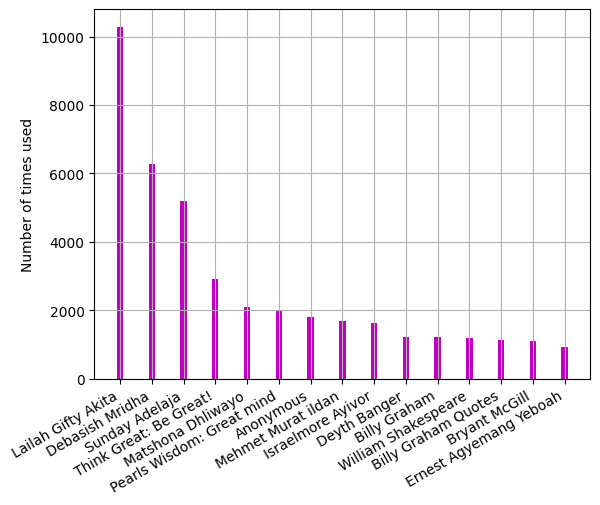

In [149]:
import numpy as np
import matplotlib.pyplot as plt

vals = sorted(author_count.items(), reverse=True)

response = int(input("How many top domains from source? up to 15: "))
x= []
y =[]
if response > 0 and response < len(vals)+1:
    for i in val[:response]:
        x.append(i[0])
        y.append(i[1])
#     y = vals[:response].values()
#     y = vals[:response].keys()
    print ("\nTop %i most are:" %response)
    print (y)

#     x = np.arange(1,len(y)+1,1)

    fig, ax = plt.subplots()

    ax.bar(x,y,align='center', width=0.2, color = 'm')

    ax.set_xticks(x)
    ax.set_xticklabels(x)
    ax.set_ylabel("Number of times used")
    ax.grid('on')   
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
else:
    print ("\nThere are not enough domains for this top amount.")

plt.show()

In [158]:
label_val = sorted(label_count.items(),key = lambda x:x[1],reverse=True)
sorted(label_count.items(),key = lambda x:x[1],reverse=True)


[('love', 31235),
 ('life', 29934),
 ('inspirational', 25537),
 ('philosophy', 13267),
 ('humor', 11201),
 ('god', 10340),
 ('truth', 10204),
 ('wisdom', 9610),
 ('happiness', 9059),
 ('hope', 8466),
 ('quotes', 8156),
 ('inspirational-quotes', 8041),
 ('faith', 7715),
 ('success', 7053),
 ('inspiration', 6853),
 ('death', 6677),
 ('writing', 6512),
 ('romance', 6109),
 ('religion', 5914),
 ('knowledge', 5875),
 ('poetry', 5793),
 ('education', 5779),
 ('motivational', 5463),
 ('You', 5455),
 ('Life', 5438),
 ('time', 5185),
 ('People', 5139),
 ('spirituality', 4793),
 ('Me', 4729),
 ('life-lessons', 4696),
 ('motivation', 4686),
 ('relationships', 4514),
 ('people', 4446),
 ('fear', 4394),
 ('books', 4363),
 ('science', 4243),
 ('purpose', 4190),
 ('friendship', 4180),
 ('change', 4094),
 ('debasish-mridha', 4038),
 ('life-quotes', 4012),
 ('work', 3999),
 ('dreams', 3953),
 ('funny', 3888),
 ('freedom', 3774),
 ('leadership', 3774),
 ('peace', 3738),
 ('Time', 3714),
 ('Love', 3593),

How many top domains from source? up to 15: 15

Top 15 most are:
[31235, 29934, 25537, 13267, 11201, 10340, 10204, 9610, 9059, 8466, 8156, 8041, 7715, 7053, 6853]


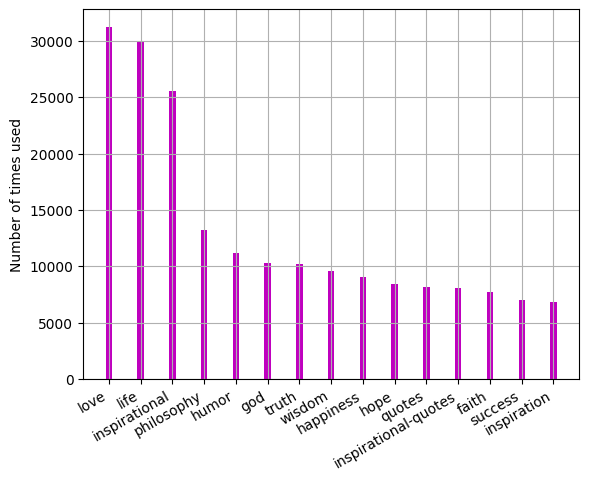

In [159]:
import numpy as np
import matplotlib.pyplot as plt

response = int(input("How many top domains from source? up to 15: "))
x= []
y =[]
if response > 0 and response < len(vals)+1:
    for i in label_val[:response]:
        x.append(i[0])
        y.append(i[1])
#     y = vals[:response].values()
#     y = vals[:response].keys()
    print ("\nTop %i most are:" %response)
    print (y)

#     x = np.arange(1,len(y)+1,1)

    fig, ax = plt.subplots()

    ax.bar(x,y,align='center', width=0.2, color = 'm')

    ax.set_xticks(x)
    ax.set_xticklabels(x)
    ax.set_ylabel("Number of times used")
    ax.grid('on')   
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
else:
    print ("\nThere are not enough domains for this top amount.")

plt.show()

In [192]:

wc_label = df[df['new_cate'].str.contains('love|life|inspirational|philosophy')]

In [193]:
wc_label

,new_cate,new_quote,new_author
0,"attributed-no-source, best, life, love, mistak...",I selfish impatient little insecure I make mis...,Marilyn Monroe
1,"dance, heaven, hurt, inspirational, life, love...",get dance like nobody watch love like never hu...,William W. Purkey
2,"attributed-no-source, dreams, love, reality, s...",know love fall asleep reality finally well dream,Dr. Seuss
3,"friend, friendship, knowledge, love",friend someone know still love,Elbert Hubbard
4,"darkness, drive-out, hate, inspirational, ligh...",darkness drive darkness light hate drive hate ...,"Martin Luther King Jr., A Testament Hope: The ..."
...,...,...,...
350821,"life, passion, adventure",many man direct ye th drug store th corner thi...,Finley Peter Dunne
350822,"life, passion, adventure",mountain man try live country instead,Louis L'Amour
353372,"Mind, Environment, Wildlife",I mind message although I hope intrude badly p...,E. O. Wilson
397035,"Club, Glove",I travel club glove,Jason Day


In [163]:
wc_author= df[df['new_author'].str.contains('Lailah Gifty Akita|Debasish Mridha|Sunday Adelaja|Think Great: Be Great')]

In [199]:
MyVect_CV=CountVectorizer(input="content",stop_words="english",tokenizer=MY_STEMMER,max_features=50) 
Vect_CV = MyVect_CV.fit_transform(wc_author['new_quote']) 
ColumnNamesCV=MyVect_CV.get_feature_names() 
CorpusDF_CV=pd.DataFrame(Vect_CV.toarray(),columns=ColumnNamesCV)
for nextcol in CorpusDF_CV.columns: 
    if(re.search(r'[^A-Za-z]+', nextcol)): 
        CorpusDF_CV= CorpusDF_CV.drop([nextcol], axis=1) 
    elif(len(str(nextcol))<3): 
        CorpusDF_CV=CorpusDF_CV.drop([nextcol], axis=1) 
    elif(len(str(nextcol))>20): 
        CorpusDF_CV=CorpusDF_CV.drop([nextcol], axis=1) 
# CorpusDF_CV['LABEL'] = 'tiktokgood' 
# CorpusDF_CV['LABEL'][100:] = 'tiktokbad'
print(CorpusDF_CV) 

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warni

       alway  beauti  becom  chang  come  day  dream  everi  faith  god  ...  \
0          0       0      0      0     0    0      0      0      0    0  ...   
1          2       1      0      0     0    0      0      0      0    0  ...   
2          0       0      0      0     0    0      0      0      0    0  ...   
3          0       0      0      0     0    0      0      0      0    0  ...   
4          0       0      1      0     1    0      0      0      0    0  ...   
...      ...     ...    ...    ...   ...  ...    ...    ...    ...  ...  ...   
21946      0       0      0      0     0    0      0      0      0    0  ...   
21947      0       0      0      0     0    0      0      0      0    0  ...   
21948      0       0      0      0     0    0      0      0      0    0  ...   
21949      0       0      0      0     0    0      0      0      0    0  ...   
21950      0       0      0      0     0    0      0      0      0    0  ...   

       strength  success  thing  think 

In [194]:
MyVect_CV=CountVectorizer(input="content",stop_words="english",tokenizer=MY_STEMMER,max_features=50) 
Vect_CV = MyVect_CV.fit_transform(wc_label['new_quote']) 
ColumnNamesCV=MyVect_CV.get_feature_names() 
CorpusDF_CV=pd.DataFrame(Vect_CV.toarray(),columns=ColumnNamesCV)
for nextcol in CorpusDF_CV.columns: 
    if(re.search(r'[^A-Za-z]+', nextcol)): 
        CorpusDF_CV= CorpusDF_CV.drop([nextcol], axis=1) 
    elif(len(str(nextcol))<3): 
        CorpusDF_CV=CorpusDF_CV.drop([nextcol], axis=1) 
    elif(len(str(nextcol))>20): 
        CorpusDF_CV=CorpusDF_CV.drop([nextcol], axis=1) 
# CorpusDF_CV['LABEL'] = 'tiktokgood' 
# CorpusDF_CV['LABEL'][100:] = 'tiktokbad'
print(CorpusDF_CV) 

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warni

        alway  beauti  becom  believ  chang  come  day  dream  end  everi  \
0           0       0      0       0      0     0    0      0    0      0   
1           0       0      0       0      0     0    0      0    0      0   
2           0       0      0       0      0     0    0      1    0      0   
3           0       0      0       0      0     0    0      0    0      0   
4           0       0      0       0      0     0    0      0    0      0   
...       ...     ...    ...     ...    ...   ...  ...    ...  ...    ...   
104814      0       0      0       0      0     0    0      0    0      0   
104815      0       0      0       0      0     0    0      0    0      0   
104816      0       0      0       0      0     0    0      0    0      0   
104817      0       0      0       0      0     0    0      0    0      0   
104818      0       0      0       0      0     0    0      0    0      0   

        ...  soul  tell  thing  think  time  want  way  word  work  world  

In [200]:
wc_author = wc_author.reset_index(drop=True)
wc_author

,new_cate,new_quote,new_author
0,"appreciate, craving, criticize, debasish, dese...",appreciate I I criticize I I deserve friend fo...,Debasish Mridha
1,"beautiful, debasish, find, flower, friendly, k...",always friendly always kind like beautiful flo...,Debasish Mridha
2,"debasish, hard, life, magical, mridha, philoso...",think life magical life hard either way right ...,Debasish Mridha
3,"blooms, debasish, flowers, forever, life, mind...",write bloom flower mind last forever,Debasish Mridha
4,"clean, debasish, dirt, life, mridha, ocean, ph...",dirt touch I like ocean everything come become...,Debasish Mridha
...,...,...,...
21946,"debasish-mridha, inspirational, philosophy, se...",humility one good expression self respect,Debasish Mridha
21947,"bitterness, cancer, inspirational",bitterness cancer bone,Lailah Gifty Akita
21948,"inspirational, vanity, whirlwind",vanity chase whirlwind,Lailah Gifty Akita
21949,"chase, inspirational, vanity, wind",chase wind,Lailah Gifty Akita


In [195]:
wc_label = wc_label.reset_index(drop=True)
wc_label

,new_cate,new_quote,new_author
0,"attributed-no-source, best, life, love, mistak...",I selfish impatient little insecure I make mis...,Marilyn Monroe
1,"dance, heaven, hurt, inspirational, life, love...",get dance like nobody watch love like never hu...,William W. Purkey
2,"attributed-no-source, dreams, love, reality, s...",know love fall asleep reality finally well dream,Dr. Seuss
3,"friend, friendship, knowledge, love",friend someone know still love,Elbert Hubbard
4,"darkness, drive-out, hate, inspirational, ligh...",darkness drive darkness light hate drive hate ...,"Martin Luther King Jr., A Testament Hope: The ..."
...,...,...,...
104814,"life, passion, adventure",many man direct ye th drug store th corner thi...,Finley Peter Dunne
104815,"life, passion, adventure",mountain man try live country instead,Louis L'Amour
104816,"Mind, Environment, Wildlife",I mind message although I hope intrude badly p...,E. O. Wilson
104817,"Club, Glove",I travel club glove,Jason Day


In [196]:
CorpusDF_CV['new_cate']=wc_label['new_cate']
CorpusDF_CV['new_author']=wc_author['new_author']
CorpusDF_CV

In [251]:
# #############################################
# ##
# ## Create Training and Testing Data
# ##
# ## Then model and test the Decision Tree
# ##
# ################################################


# ## Before we start our modeling, let's visualize and
# ## explore.

# ##It might be very interesting to see the word clouds
# ## for each  of the topics.
# ##--------------------------------------------------------
# List_of_WC=[]
# topics = ['love','life','inspirational','philosophy']
# for mytopic in topics:

#     tempdf = CorpusDF_CV[CorpusDF_CV['new_cate'].str.contains(mytopic)]
#     print(tempdf)

#     tempdf =tempdf.sum(axis=0,numeric_only=True)
#     #print(tempdf)

#     #Make var name
#     NextVarName=str("wc"+str(mytopic))
#     #print( NextVarName)

#     ##In the same folder as this code, I have three images
#     ## They are called: food.jpg, bitcoin.jpg, and sports.jpg
#     #next_image=str(str(mytopic) + ".jpg")
#     #print(next_image)

#     ## https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

#     ###########
#     ## Create and store in a list the wordcloud OBJECTS
#     #########
#     NextVarName = WordCloud(width=1000, height=600, background_color="white",
#                             min_word_length=4, #mask=next_image,
#                             max_words=200).generate_from_frequencies(tempdf)

#     ## Here, this list holds all three wordclouds I am building
#     List_of_WC.append(NextVarName)

# ##------------------------------------------------------------------
# print(List_of_WC)
# ##########
# ########## Create the wordclouds
# ##########
# fig=plt.figure(figsize=(25, 25))
# #figure, axes = plt.subplots(nrows=2, ncols=2)
# NumTopics=len(topics)
# for i in range(NumTopics):
#     print(i)
#     ax = fig.add_subplot(NumTopics,1,i+1)
#     plt.imshow(List_of_WC[i], interpolation='bilinear')
#     plt.axis("off")
#     plt.savefig("wc_label.pdf")




In [250]:

# #############################################
# ##
# ## Create Training and Testing Data
# ##
# ## Then model and test the Decision Tree
# ##
# ################################################


# ## Before we start our modeling, let's visualize and
# ## explore.

# ##It might be very interesting to see the word clouds
# ## for each  of the topics.
# ##--------------------------------------------------------
# List_of_WC=[]
# topics = ['Lailah Gifty Akita','Debasish Mridha','Sunday Adelaja','Think Great: Be Great']
# for mytopic in topics:

#     tempdf = CorpusDF_CV[CorpusDF_CV['new_author'].str.contains(mytopic)]
#     print(tempdf)

#     tempdf =tempdf.sum(axis=0,numeric_only=True)
#     #print(tempdf)

#     #Make var name
#     NextVarName=str("wc"+str(mytopic))
#     #print( NextVarName)

#     ##In the same folder as this code, I have three images
#     ## They are called: food.jpg, bitcoin.jpg, and sports.jpg
#     #next_image=str(str(mytopic) + ".jpg")
#     #print(next_image)

#     ## https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

#     ###########
#     ## Create and store in a list the wordcloud OBJECTS
#     #########
#     NextVarName = WordCloud(width=1000, height=600, background_color="white",
#                             min_word_length=4, #mask=next_image,
#                             max_words=200).generate_from_frequencies(tempdf)

#     ## Here, this list holds all three wordclouds I am building
#     List_of_WC.append(NextVarName)

# ##------------------------------------------------------------------
# print(List_of_WC)
# ##########
# ########## Create the wordclouds
# ##########
# fig=plt.figure(figsize=(25, 25))
# #figure, axes = plt.subplots(nrows=2, ncols=2)
# NumTopics=len(topics)
# for i in range(NumTopics):
#     print(i)
#     ax = fig.add_subplot(NumTopics,1,i+1)
#     plt.imshow(List_of_WC[i], interpolation='bilinear')
#     plt.axis("off")
#     plt.savefig("wc_author.pdf")




In [51]:
df['new_author'].value_counts()

Debasish Mridha                                       6278
Lailah Gifty Akita                                    5320
Sunday Adelaja                                        4286
Lailah Gifty Akita, Think Great: Be Great!            2901
Matshona Dhliwayo                                     2098
                                                      ... 
Elizabeth Miyu Blake, GreenBean: True Blue Family        1
Jacob Grimm, The Singing, Springing Lark                 1
Arthur Schopenhauer, The Wisdom Life, Other Essays       1
Tania James, Aerogrammes: Other Stories                  1
Norodom Sihamoni                                         1
Name: new_author, Length: 103200, dtype: int64

In [60]:
df['new_cate'].value_counts()

education, happiness, hope, inspirational, intelligence, knowledge, life, love, philosophy, quotes, truth, wisdom                                                                                                                                                                                                                                                                          1628
happiness                                                                                                                                                                                                                                                                                                                                                                                   966
humorous                                                                                                                                                                                                                                

In [58]:
# we need choose 4 authors and see how many labels we have
df_author = df.loc[(df['new_author'] == 'Lailah Gifty Akita') |
               (df['new_author'] =='Debasish Mridha') | 
               (df['new_author'] =='Sunday Adelaja') |  
               (df['new_author'] =='Matshona Dhliwayo')]

In [61]:
# choose 4 labels
df_label = df.loc[(df['new_cate'] == 'happiness') |
               (df['new_cate'] =='humorous') | 
               (df['new_cate'] =='friendship') |  
               (df['new_cate'] =='prayer')]

In [106]:
MyVect_CV=CountVectorizer(input="content",stop_words="english",tokenizer=MY_STEMMER,max_features=50) 
Vect_CV = MyVect_CV.fit_transform(df_label['new_quote']) 
ColumnNamesCV=MyVect_CV.get_feature_names() 
CorpusDF_CV=pd.DataFrame(Vect_CV.toarray(),columns=ColumnNamesCV)
for nextcol in CorpusDF_CV.columns:
    if(re.search(r'[^A-Za-z]+', nextcol)): 
        CorpusDF_CV= CorpusDF_CV.drop([nextcol], axis=1) 
    elif(len(str(nextcol))<3): 
        CorpusDF_CV=CorpusDF_CV.drop([nextcol], axis=1) 
    elif(len(str(nextcol))>20): 
        CorpusDF_CV=CorpusDF_CV.drop([nextcol], axis=1)  
df_label = df_label.reset_index(drop=True)
CorpusDF_CV['new_cate']=df_label['new_cate']
CorpusDF_CV

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warni

,alway,anoth,answer,ask,becom,come,day,everi,feel,friend,...,think,time,want,way,wife,woman,word,work,world,new_cate
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,happiness
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,happiness
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,happiness
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,happiness
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,happiness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,prayer
3611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,prayer
3612,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,prayer
3613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,prayer


In [120]:
MyVect_CV=CountVectorizer(input="content",stop_words="english",tokenizer=MY_STEMMER,max_features=50) 
Vect_CV = MyVect_CV.fit_transform(df_author['new_quote']) 
ColumnNamesCV=MyVect_CV.get_feature_names() 
CorpusDF_CV=pd.DataFrame(Vect_CV.toarray(),columns=ColumnNamesCV)
for nextcol in CorpusDF_CV.columns:
    if(re.search(r'[^A-Za-z]+', nextcol)): 
        CorpusDF_CV= CorpusDF_CV.drop([nextcol], axis=1) 
    elif(len(str(nextcol))<3): 
        CorpusDF_CV=CorpusDF_CV.drop([nextcol], axis=1) 
    elif(len(str(nextcol))>20): 
        CorpusDF_CV=CorpusDF_CV.drop([nextcol], axis=1)  
df_author = df_author.reset_index(drop=True)
CorpusDF_CV['new_author']=df_author['new_author']
CorpusDF_CV

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warni

,alway,beauti,becom,chang,come,creat,dream,everi,faith,fear,...,thing,think,thought,time,want,way,wisdom,work,world,new_author
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Debasish Mridha
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Debasish Mridha
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,Debasish Mridha
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Debasish Mridha
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Debasish Mridha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Debasish Mridha
17978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lailah Gifty Akita
17979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lailah Gifty Akita
17980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lailah Gifty Akita


In [121]:
FinalDF_Count = CorpusDF_CV

In [122]:

## Create the testing set - grab a sample from the training set. 
## Be careful. Notice that right now, our train set is sorted by label.
## If your train set is large enough, you can take a random sample.
from sklearn.model_selection import train_test_split
import random as rd
#rd.seed(1234)
TrainDF1, TestDF1 = train_test_split(FinalDF_Count, test_size=0.2)
TrainDF1

,alway,beauti,becom,chang,come,creat,dream,everi,faith,fear,...,thing,think,thought,time,want,way,wisdom,work,world,new_author
5995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lailah Gifty Akita
11994,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Matshona Dhliwayo
9457,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Debasish Mridha
13927,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sunday Adelaja
1416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Debasish Mridha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lailah Gifty Akita
14832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sunday Adelaja
10932,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Debasish Mridha
5891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lailah Gifty Akita


In [123]:
Test1Labels_new_author=TestDF1["new_author"]
print(Test1Labels_new_author)
## remove labels
TestDF1 = TestDF1.drop(["new_author"], axis=1)
print(TestDF1)
Train1Labels_new_author=TrainDF1["new_author"]
print(Train1Labels_new_author)
## remove labels
TrainDF1 = TrainDF1.drop(["new_author"], axis=1)

819         Debasish Mridha
16663     Matshona Dhliwayo
7848     Lailah Gifty Akita
14808       Debasish Mridha
17522    Lailah Gifty Akita
                ...        
16617        Sunday Adelaja
17412        Sunday Adelaja
7147        Debasish Mridha
11580     Matshona Dhliwayo
16278       Debasish Mridha
Name: new_author, Length: 3597, dtype: object
       alway  beauti  becom  chang  come  creat  dream  everi  faith  fear  \
819        0       0      0      0     0      0      0      0      0     0   
16663      0       0      0      0     0      0      0      0      0     0   
7848       0       0      0      0     0      0      0      0      1     0   
14808      0       0      0      0     0      0      0      0      0     0   
17522      0       0      0      0     0      0      0      0      0     0   
...      ...     ...    ...    ...   ...    ...    ...    ...    ...   ...   
16617      0       0      0      0     0      0      0      0      0     0   
17412      0       0  

In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(Test1Labels_new_author, Prediction2)

0.443147067000278

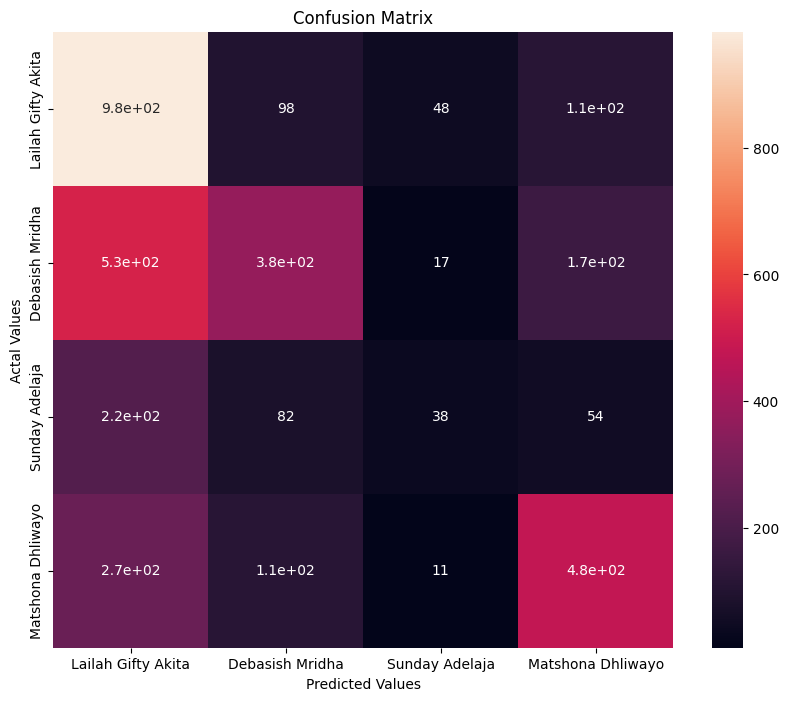

In [132]:

####################################################################
########################### Naive Bayes ############################
####################################################################
from sklearn.naive_bayes import MultinomialNB
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.fit
#Create the modeler
MyModelNB= MultinomialNB()



# ## Run on all three Dfs.................
# NB1=MyModelNB.fit(TrainDF1, Train1Labels_new_cate)
# Prediction1 = MyModelNB.predict(TestDF1)
# print(np.round(MyModelNB.predict_proba(TestDF1),2))

NB2=MyModelNB.fit(TrainDF1, Train1Labels_new_author)
Prediction2 = MyModelNB.predict(TestDF1)
# print(np.round(MyModelNB.predict_proba(TestDF1),2))
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix2 = confusion_matrix(Test1Labels_new_author, Prediction2)
cm_df2 = pd.DataFrame(cnf_matrix2,
                     index = ['Lailah Gifty Akita', 'Debasish Mridha', 'Sunday Adelaja', 'Matshona Dhliwayo'], 
                     columns = ['Lailah Gifty Akita', 'Debasish Mridha', 'Sunday Adelaja', 'Matshona Dhliwayo'])
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df2, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Index(['alway', 'beauti', 'becom', 'chang', 'come', 'creat', 'dream', 'everi',
       'faith', 'fear', 'feel', 'god', 'good', 'great', 'happi', 'heart',
       'hope', 'human', 'joy', 'kind', 'know', 'knowledg', 'learn', 'let',
       'life', 'light', 'like', 'live', 'love', 'make', 'man', 'mind', 'need',
       'peac', 'peopl', 'person', 'power', 'purpos', 'soul', 'spirit',
       'success', 'thing', 'think', 'thought', 'time', 'want', 'way', 'wisdom',
       'work', 'world'],
      dtype='object')


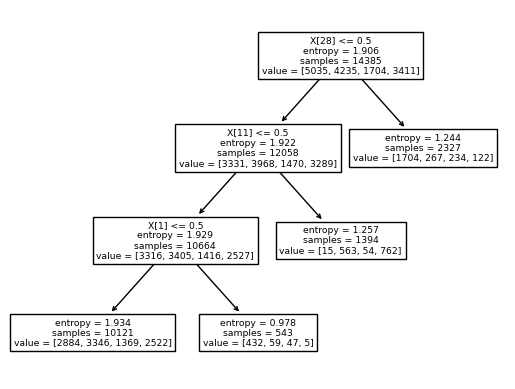

In [134]:



#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#########################################################
#############    Decision Trees   #######################
#########################################################
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
## In Python - the Decision Trees work ONLY on numeric data

### TEST
#print(StudentTestLabels_Num)
#print(StudentTestData_Num)
### TRAIN - Num
#print(StudentTrainLabels_Num)
#print(StudentTrainData_Num)

#---------------------------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
MyDT_R=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=4, 
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None, 
                            class_weight=None)

## perform DT
MyDT_R.fit(TrainDF1, Train1Labels_new_author)
    ## plot the tree
tree.plot_tree(MyDT_R)

feature_namesR=TrainDF1.columns
print(feature_namesR)


In [127]:
feature_namesR[11]

'god'

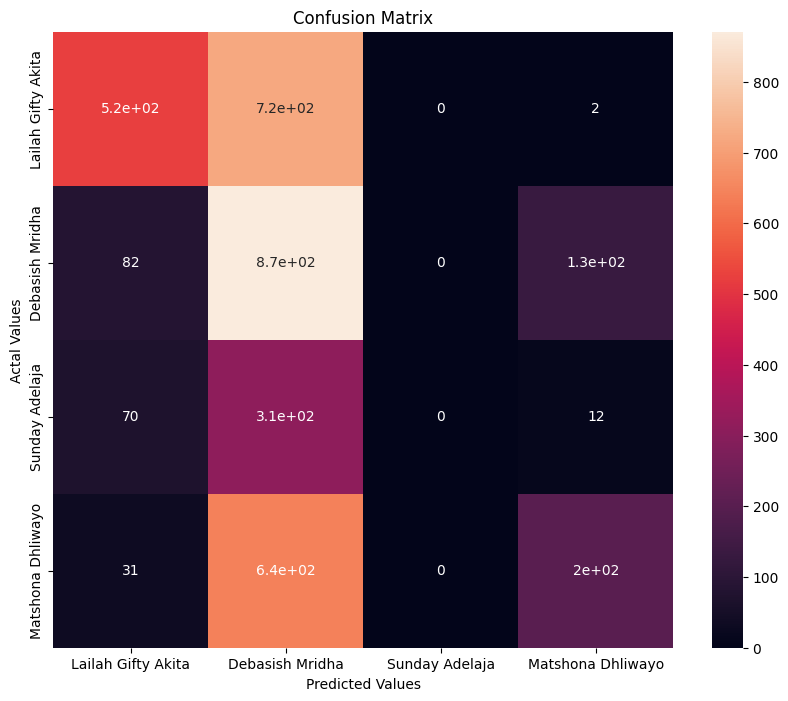

In [135]:


Prediction2 = MyDT_R.predict(TestDF1)
# print(np.round(MyModelNB.predict_proba(TestDF1),2))
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix2 = confusion_matrix(Test1Labels_new_author, Prediction2)
cm_df2 = pd.DataFrame(cnf_matrix2,
                     index = ['Lailah Gifty Akita', 'Debasish Mridha', 'Sunday Adelaja', 'Matshona Dhliwayo'], 
                     columns = ['Lailah Gifty Akita', 'Debasish Mridha', 'Sunday Adelaja', 'Matshona Dhliwayo'])
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df2, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [109]:
Test1Labels_new_cate=TestDF1["new_cate"]
# print(Test1Labels_new_cate)
## remove labels
TestDF1 = TestDF1.drop(["new_cate"], axis=1)
# print(TestDF1)
Train1Labels_new_cate=TrainDF1["new_cate"]
print(Train1Labels_new_cate)
## remove labels
TrainDF1 = TrainDF1.drop(["new_cate"], axis=1)

2977      humorous
2181     happiness
2876      humorous
2770      humorous
2899      humorous
           ...    
534     friendship
1450    friendship
1494    friendship
168      happiness
601         prayer
Name: new_cate, Length: 2892, dtype: object


In [131]:

####################################################################
########################### Naive Bayes ############################
####################################################################
from sklearn.naive_bayes import MultinomialNB
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.fit
#Create the modeler
MyModelNB= MultinomialNB()



# ## Run on all three Dfs.................
# NB1=MyModelNB.fit(TrainDF1, Train1Labels_new_cate)
# Prediction1 = MyModelNB.predict(TestDF1)
# print(np.round(MyModelNB.predict_proba(TestDF1),2))

NB2=MyModelNB.fit(TrainDF1, Train1Labels_new_cate)
Prediction2 = MyModelNB.predict(TestDF1)
# print(np.round(MyModelNB.predict_proba(TestDF1),2))
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix2 = confusion_matrix(Test1Labels_new_cate, Prediction2)
cm_df2 = pd.DataFrame(cnf_matrix2,
                     index = ['happiness', 'humorous', 'friendship', 'prayer'], 
                     columns = ['happiness', 'humorous', 'friendship', 'prayer'])
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df2, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [14385, 2892]

Index(['alway', 'anoth', 'answer', 'ask', 'becom', 'come', 'day', 'everi',
       'feel', 'friend', 'friendship', 'god', 'good', 'great', 'hand', 'happi',
       'heart', 'know', 'let', 'life', 'like', 'littl', 'live', 'look', 'love',
       'make', 'man', 'marri', 'mean', 'need', 'noth', 'old', 'peopl',
       'person', 'pray', 'prayer', 'right', 'say', 'someth', 'tell', 'thing',
       'think', 'time', 'want', 'way', 'wife', 'woman', 'word', 'work',
       'world'],
      dtype='object')


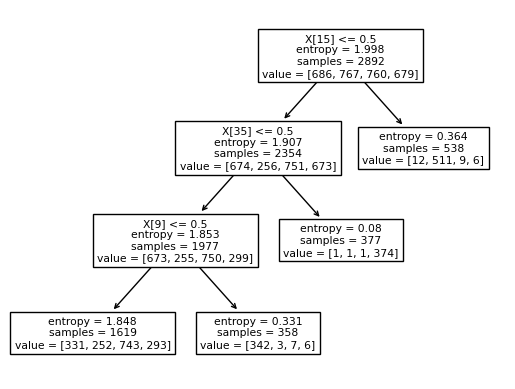

In [116]:



#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#########################################################
#############    Decision Trees   #######################
#########################################################
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
## In Python - the Decision Trees work ONLY on numeric data

### TEST
#print(StudentTestLabels_Num)
#print(StudentTestData_Num)
### TRAIN - Num
#print(StudentTrainLabels_Num)
#print(StudentTrainData_Num)

#---------------------------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
MyDT_R=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=4, 
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None, 
                            class_weight=None)

## perform DT
MyDT_R.fit(TrainDF1, Train1Labels_new_cate)
    ## plot the tree
tree.plot_tree(MyDT_R)

feature_namesR=TrainDF1.columns
print(feature_namesR)


In [118]:
feature_namesR[15]
feature_namesR[35]

'prayer'

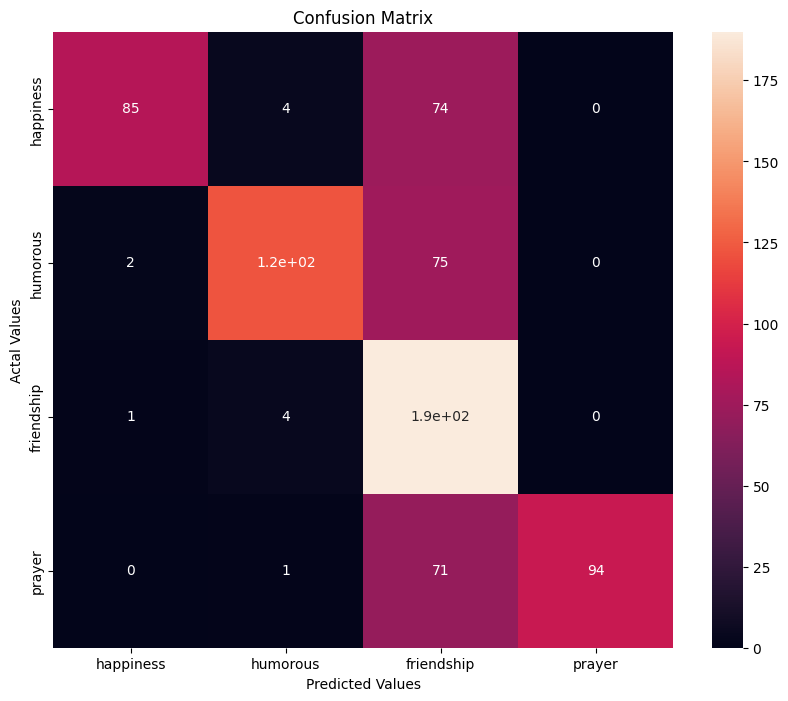

In [114]:


Prediction2 = MyDT_R.predict(TestDF1)
# print(np.round(MyModelNB.predict_proba(TestDF1),2))
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix2 = confusion_matrix(Test1Labels_new_cate, Prediction2)
cm_df2 = pd.DataFrame(cnf_matrix2,
                     index = ['happiness', 'humorous', 'friendship', 'prayer'], 
                     columns = ['happiness', 'humorous', 'friendship', 'prayer'])
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df2, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()